In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

Q. [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]의 합계, 평균, 중앙값, 분산, 표준편차, 최대값, 최소값을 구하세요.

In [2]:
# A.
import numpy as np
data = np.arange(10)
print(np.sum(data))
print(np.mean(data))
print(np.var(data, ddof=1))
print(np.std(data, ddof=1))
print(np.max(data))
print(np.min(data))
print(np.median(data))

45
4.5
9.166666666666666
3.0276503540974917
9
0
4.5


Q. [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]의 1,3사분위수를 구하세요

In [3]:
data = np.arange(10)
q1 = stats.scoreatpercentile(data,25)
q3 = stats.scoreatpercentile(data,75)
print(q1)
print(q3)

2.25
6.75


Q "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하여 df1과 df2를 행방향으로 결합, df 생성
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [5]:
df1 = pd.read_csv("dataset/5_2_fm.csv")
df2 = df1.copy()
df2.species = list('CCCDDD')
df = pd.concat([df1,df2])
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,2
1,C,3
2,C,4
3,D,6


In [7]:
group = df.groupby('species')
print(group.mean())
print(group.std(ddof=1))
group.describe()

         length
species        
A             3
B             8
C             3
D             8
         length
species        
A           1.0
B           2.0
C           1.0
D           2.0


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0
C          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
D          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

Q. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열에 16행을 추가하여 20행 3열로 작성하세요. 행 추가시 3의 배수 행은 1번행, 그 다음행은 2번행, 그 다음행은 3번행을 복사해서 사용 
- 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행하세요.

In [11]:
import pandas as pd
shoes = pd.read_csv("./dataset/5_2_shoes.csv")
shoes1=shoes.copy()

In [12]:
for i in range(4,21):
    if i % 3 == 0:
        shoes1.loc[i] = shoes1.iloc[1]
    elif i % 3 == 1:
        shoes1.loc[i] = shoes1.iloc[2]
    else:
        shoes1.loc[i] = shoes1.iloc[3]
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,osaka,blue,13
5,osaka,red,9
6,tokyo,red,15
7,osaka,blue,13
8,osaka,red,9
9,tokyo,red,15


In [13]:
cross = pd.pivot_table(data=shoes1, values='sales',aggfunc='sum', index= 'store', columns = 'color')
cross

color,blue,red
store,,
osaka,91,63
tokyo,10,90


In [14]:
# p값이 0.05보다 작으므로 매장에 따라 신발색이 다르다는 가설은 유의미하다.
sp.stats.chi2_contingency(cross,correction=False)

(61.00195901943134,
 5.701804303037147e-15,
 1,
 array([[61.23622047, 92.76377953],
        [39.76377953, 60.23622047]]))

Q."./dataset/4_cov.csv"을 데이터프레임으로 불러와서 처음 6개행을 선택한 후 
두개 칼럼의 공분산 행렬과 상관행렬을 구하세요

In [15]:
cov_data = pd.read_csv('dataset/4_cov.csv')
df_cov = cov_data.iloc[:6,:]
x = df_cov['x']
y = df_cov['y']
np.cov(x,y,ddof=1)

array([[ 1.97466667,  3.78666667],
       [ 3.78666667, 13.46666667]])

In [16]:
np.corrcoef(x,y)

array([[1.        , 0.73431115],
       [0.73431115, 1.        ]])

Q. 평균이 0, 표준편차가 1인 정규분포의 확률밀도함수를 그래프로 표현하세요. 단, x 범위는 np.arange(-3,3,0.1)

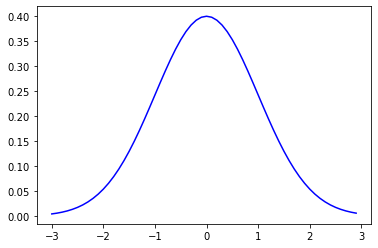

In [17]:
x_plot = np.arange(-3,3,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=0,scale=1),color='blue')

Q. 평균이 0, 표준편차가 1인 정규분포에서 확률변수 1일때의 확률밀도를 구하세요

In [18]:
stats.norm.pdf(loc=0,scale=1,x=1)

0.24197072451914337

Q. 평균이 0, 표준편차가 1인 정규분포의 누적분포함수를 그래프로 표현하세요. 단, x 범위는 np.arange(-3,3,0.1)

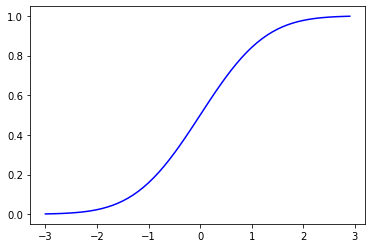

In [19]:
x_plot = np.arange(-3,3,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=0, scale=1),color='blue')

Q. 평균이 0, 표준편차가 1인 정규분포에서 얻은 확률변수 1 이하가 되는 확률

In [20]:
stats.norm.cdf(loc=0,scale=1,x=1)

0.8413447460685429

Q. 100000개의 원소에 대한 평균이 10, 표준편차가 3인 모집단을 생성하여 num 칼럼을 갖는  df를 만든 후 다음사항을 수행하세요.   
- df에서 num 칼럼의 통계요약표를 구하고 평균과 표준편차가 일치하는지 확인 하세요.
- 동일한 평균과 표준편차를 적용하여 확률밀도 그래프를 그리세요
- df 모집단의 히스토그램과 정규분포의 확률밀도간의 일치를 시각화해서 표현하세요

In [35]:
pop1 = sp.stats.norm.rvs(loc=10,scale=3, size=100000)
pop1[:10]

array([ 9.63257828, 10.68450946,  8.94308461,  7.50833967,  9.21673055,
       10.50806268, 12.0208693 ,  9.01839518,  9.08410256, 11.574596  ])

In [36]:
df = pd.DataFrame(pop1, columns=['num'])
df.head()
df.shape

(100000, 1)

In [37]:
df.num.describe()

count    100000.000000
mean         10.009819
std           2.994754
min          -2.980662
25%           7.992564
50%          10.009011
75%          12.021024
max          22.504353
Name: num, dtype: float64

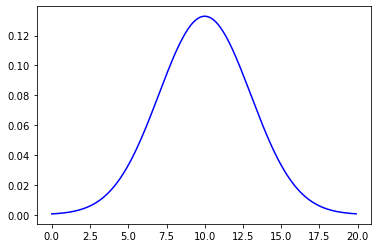

In [38]:
x = np.arange(0,20,0.1) 
plt.plot(x,
        stats.norm.pdf(x=x,loc=10,scale=3),
        color='blue')

<AxesSubplot:>

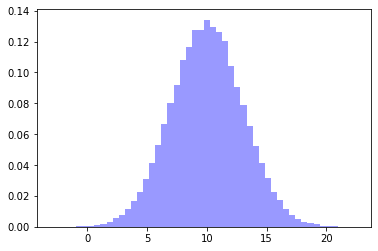

In [39]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df, kde=False, norm_hist=True, color='blue')

<AxesSubplot:>

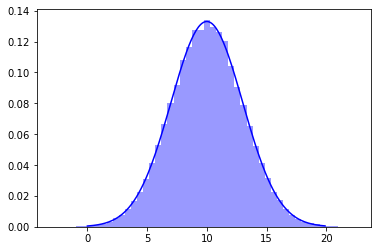

In [40]:
x = np.arange(0,20,0.1) 
plt.plot(x,
        stats.norm.pdf(x=x,loc=10,scale=3),
        color='blue')
sns.distplot(df, kde=False, norm_hist=True, color='blue')

Q. 평균이 0, 표준편차가 1, 원소가 10000개인 정규분포를 따르는 모집단을 생성 후 다음을 수행하세요.
- 뒤에서 10개를 추출
- 요약통계표를 구한 후 평균과 표준편차를 확인

In [41]:
np.random.seed(1)
sampling_norm = stats.norm.rvs(loc=0, scale=1,size=10000)
a = sampling_norm[:10]
b = sampling_norm[-10:]
c = sampling_norm[9990:]
print(a)
print(b)
print(c)
pd.DataFrame(sampling_norm).describe()

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
[ 1.925192   -0.05326391 -0.80631076 -0.39760738 -0.57123191  0.07295857
  0.48910216 -1.01414382 -0.06269623 -1.43786989]
[ 1.925192   -0.05326391 -0.80631076 -0.39760738 -0.57123191  0.07295857
  0.48910216 -1.01414382 -0.06269623 -1.43786989]


,0
count,10000.000000
mean,0.009773
std,0.998836
min,-3.656440
25%,-0.662925
50%,0.008454
75%,0.671809
max,4.026849


Q. 모집단 population = stats.norm(loc=0,scale=1) 일때 샘플사이즈 변동에 따른 표본평균의 편차를 시뮬레이션하려고 한다. 다음을 수행하세요.
- 모집단에서 표본 추출시 샘플사이즈나 실행횟수를 바꿔가면서 표본평균을 계산하는 사용자 함수를 작성
- 샘플사이즈 변동을 위한 배열 100개 생성(size_array)
- 샘플사이즈별 평균의 표준편차를 시뮬레이션 한다
- 모집단에서 표본을 추출시 표준오차를 구한다.
- 시뮬레이션 결과와 표준오차의 값을 그래프로 비교한다.

In [45]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        population = stats.norm(loc=0,scale=1)
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [50]:
size_array = np.arange(0,100)
size_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [51]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0,len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i],n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)
sample_mean_std_array

array([       nan, 0.88961547, 0.6400517 , 0.63813893, 0.46351117,
       0.43173965, 0.42945545, 0.35735719, 0.40131284, 0.32247384,
       0.33056309, 0.27677521, 0.28625919, 0.3043166 , 0.27398386,
       0.2477011 , 0.24362031, 0.25575094, 0.24194081, 0.22409725,
       0.20556933, 0.23848459, 0.21533939, 0.19957839, 0.18231754,
       0.19972658, 0.16734288, 0.19670304, 0.2130785 , 0.17339975,
       0.19469678, 0.17488438, 0.17539813, 0.19467205, 0.15979235,
       0.15289058, 0.16567045, 0.16659912, 0.16919004, 0.15789452,
       0.15937497, 0.14789899, 0.14447839, 0.16735172, 0.14253205,
       0.15862095, 0.13884961, 0.15278786, 0.13316996, 0.1431121 ,
       0.1461391 , 0.15136047, 0.15035926, 0.1390362 , 0.14428032,
       0.14916302, 0.12824132, 0.15779124, 0.1476919 , 0.14280413,
       0.13042833, 0.10718708, 0.12100961, 0.12578891, 0.1224276 ,
       0.1116987 , 0.13437732, 0.11993065, 0.12119928, 0.1238367 ,
       0.11175228, 0.11180224, 0.10596692, 0.10596529, 0.13071

In [52]:
population = stats.norm(loc=0,scale=1)
se = population.std()/np.sqrt(size_array)
se

array([       inf, 1.        , 0.70710678, 0.57735027, 0.5       ,
       0.4472136 , 0.40824829, 0.37796447, 0.35355339, 0.33333333,
       0.31622777, 0.30151134, 0.28867513, 0.2773501 , 0.26726124,
       0.25819889, 0.25      , 0.24253563, 0.23570226, 0.22941573,
       0.2236068 , 0.21821789, 0.21320072, 0.20851441, 0.20412415,
       0.2       , 0.19611614, 0.19245009, 0.18898224, 0.18569534,
       0.18257419, 0.1796053 , 0.1767767 , 0.17407766, 0.17149859,
       0.16903085, 0.16666667, 0.16439899, 0.16222142, 0.16012815,
       0.15811388, 0.15617376, 0.15430335, 0.15249857, 0.15075567,
       0.1490712 , 0.14744196, 0.14586499, 0.14433757, 0.14285714,
       0.14142136, 0.14002801, 0.13867505, 0.13736056, 0.13608276,
       0.13483997, 0.13363062, 0.13245324, 0.13130643, 0.13018891,
       0.12909944, 0.12803688, 0.12700013, 0.12598816, 0.125     ,
       0.12403473, 0.12309149, 0.12216944, 0.12126781, 0.12038585,
       0.11952286, 0.11867817, 0.11785113, 0.11704115, 0.11624

Text(0, 0.5, 'mean std value')

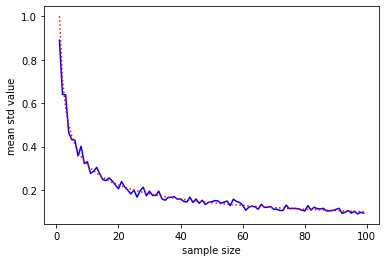

In [54]:
plt.plot(size_array, sample_mean_std_array, color='blue')
plt.plot(size_array, se, color= 'red', linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean std value')

Q. 평균 0, 표준편차 1인 정규분포의 랜덤난수 10개를 생성하고 다음을 수행하세요.
- 신뢰수준 95%의 신뢰구간을 구하세요
- 하측신뢰한계와 상측신뢰한계를 구한 후 신뢰구간과 비교하여 동일한지 확인하세요

In [59]:
np.random.seed(1)
data = stats.norm.rvs(loc=0,scale=1,size=10)

df = len(data)-1
mu = np.mean(data)
sigma = np.std(data,ddof=1)
se = sigma/np.sqrt(len(data))
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(-0.9951407873558437, 0.8008590057436439)

In [60]:
t_975 = stats.t.ppf(q=0.975, df=df)
lower = mu - t_975*se
print(lower)
upper = mu + t_975*se
print(upper)

-0.9951407873558437
0.8008590057436439


Q. 'dataset/5_8_jfw.csv'를 데이터프레임으로 불어와서 다음을 수행하세요.
- 20 ~ 39 행인덱스를 추가하고 값은 0 ~ 19 행인덱스의 값으로 대체한다.
- 과자봉지 무게의 평균이 50g과 차이가 있는지 검정한 결과를 기술한다.

In [65]:
data = pd.read_csv('dataset/5_8_jfw.csv')
data.head()
for i in range(0,20):
    data.loc[i+20] = data.iloc[i]
data.head()

,weight
0,58.529820
1,52.353039
2,74.446169
3,52.983263
4,55.876879


In [68]:
stats.ttest_1samp(data,50)

Ttest_1sampResult(statistic=array([3.94041386]), pvalue=array([0.00032712]))

In [66]:
mu = np.mean(data)
df = len(data) - 1
sigma = np.std(data,ddof=1)
se=sigma/np.sqrt(len(data))
t_value = (mu-50)/se
t_value

weight    3.940414
dtype: float64

In [67]:
# p값이 0.05 보다 작으므로 유의미한 차이가 있다고 볼 수 있음 
alpha = stats.t.cdf(t_value,df=df)
(1 - alpha)*2

array([0.00032712])

Q. 'dataset/5_9_ptt.csv'를 데이터프레임으로 불러와서 다음을 수행하세요.
- medicine 칼럼의 before와 after를 기준으로 d1, d2 두개의 데이터 프레임으로 분리한 후 df1, df2의 0 ~ 4번 인덱스의 값을 5 ~9번 인덱스의 값으로 추가하여 d1, d2 각각 9개의 행으로 구성된 독립표본을 만든다.
- d1, d2 체온의 평균 차이가 있는지 검정을 수행한다.

In [74]:
data = pd.read_csv('dataset/5_9_ptt.csv')
data
d1 = data[data.medicine=='before']
for i in range(0,5):
    d1.loc[i+5] = d1.iloc[i]
print(d1)
data2 = data[data.medicine=='after']
data2.reset_index(inplace=True)
d2 = data2.drop(['index'],axis=1)
for i in range(0,5):
    d2.loc[i+5] = d2.iloc[i]
print(d2)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A   before              36.2
6      B   before              36.2
7      C   before              35.3
8      D   before              36.1
9      E   before              36.1
  person medicine  body_temperature
0      A    after              36.8
1      B    after              36.1
2      C    after              36.8
3      D    after              37.1
4      E    after              36.9
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [75]:
# p값이 0.05 보다 작으므로 역시 유의미한 차이가 있다고 판단
stats.ttest_ind(d1.body_temperature, d2.body_temperature, equal_var=False)

Ttest_indResult(statistic=-4.733592351663112, pvalue=0.0001658761328558448)

Q. 'dataset/7_1_beer.csv'을 데이터프레임 d1 이름으로 불러와서 다음을 수행하세요.
- d1 인덱스 30 ~ 59의 값을 인덱스 0 ~ 29의 값으로 대체하는데 30은 1, 31은 0, 32는 3, 33은 2와 같이 처리한다.
- d1에 대하여 pairplot, lmplot, jointplot으로 그래프를 그려보고 시각적 탐색 내용을 기술한다.
- 정규선형모델을 구축하고 기온이 맥주매상에 영향을 미치는지 여부를 검정한 결과를 기술한다.
- 정규선형모델을 이용하여 기온이 30일때의 맥주 예상매출액을 구한다.
- 정규선형모델을 이용하여 자료의 기온값에 따른 맥주 예상매출액을 구한다.
- 모델식에 의한 예측과 실제간의 잔차를 구한다.
- 모델식이 설명할 수 있는 정도를 나타내는 조정된 결정계수를 구한다. 
- 잔차의 정규성, 독립성을 시각화하여 확인한다.
- summary를 출력하고 주요 항목에 대한 의미를 기술한다.

In [78]:
d1 = pd.read_csv('dataset/7_1_beer.csv')
for i in range(0,30):
    if i % 2 == 0:
        d1.loc[i+30] = d1.iloc[i+1]
    else:
        d1.loc[i+30] = d1.iloc[i-1]
d1.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


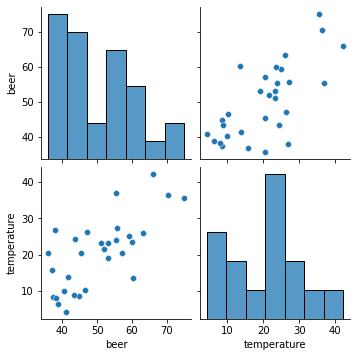

In [79]:
sns.pairplot(d1)

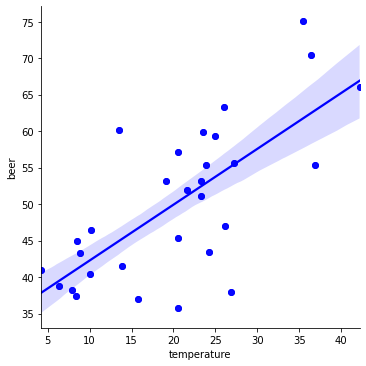

In [80]:
sns.lmplot(x='temperature',y='beer',data=d1,
          scatter_kws = {'color':'blue'},
          line_kws ={'color':'blue'})

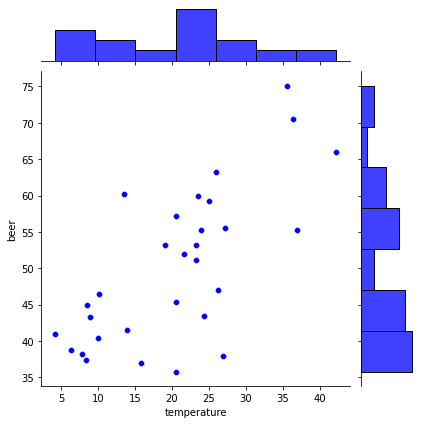

In [81]:
sns.jointplot(x='temperature',y='beer',data=d1,color='blue')

In [83]:
# 기온에 대한 계수는 유의하게 0과 다르다고 판단, 
# 기온이 맥주 매상에 영향을 미친다는 것을 알 수 있음
lm_model = smf.ols('beer ~ temperature', data=d1).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     58.93
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           2.14e-10
Time:                        16:25:46   Log-Likelihood:                -204.91
No. Observations:                  60   AIC:                             413.8
Df Residuals:                      58   BIC:                             418.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      2.248     15.399      0.000      30.111      39.109
temperature     0.7654      0.100      7.676      0.000       0.566       0.965
==============================================================================
Omnibus:                        0.772   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.580
Skew:                          -0.240   Prob(JB):                        0.748
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [85]:
lm_model.rsquared_adj

0.49540689759672374

In [86]:
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182,
       53.74590495, 50.3014808 , 55.20021737, 42.26449113, 37.82501112,
       46.70397114, 54.51133254, 44.94348769, 41.11634975, 52.44467805,
       49.22988218, 54.66441806, 52.44467805, 53.21010564, 52.59776357,
       41.03980699, 61.78289462, 45.24965873, 50.3014808 , 55.42984564,
       50.3014808 , 42.41757665, 40.6570932 , 51.14345115, 52.9039346 ,
       66.91125946, 41.42252079, 62.85449324, 39.50895182, 62.47177945])

In [87]:
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

<AxesSubplot:ylabel='Density'>

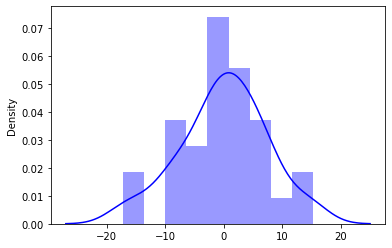

In [88]:
# 잔차의 정규성
sns.distplot(resid, color='blue')

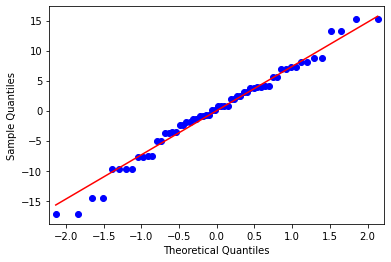

In [90]:
sm.qqplot(resid,line='s');

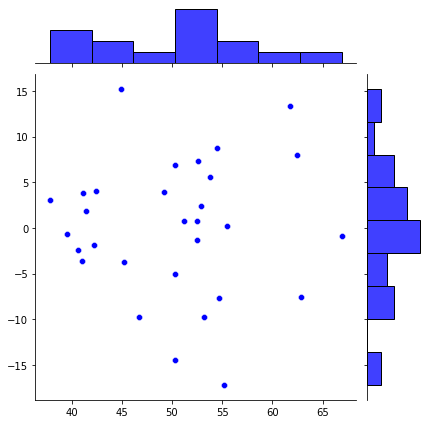

In [92]:
sns.jointplot(lm_model.predict(),resid,
             joint_kws = {'color':'blue'},
             marginal_kws = {'color':'blue'})

#### 주요 지표의 의미 
- std err : 계수의 표준오차
- P>|t| : 귀무가설을 계수의 값이 0이라고 했을 때의 p값
- 95% 신뢰구간의 하측신뢰한계와 상측신뢰한계
                             
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
- Df Models : 사용된 독립변수의 수
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수
 - 결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표
 - 모델에 의한 추측치가 종속변수의 실젯값과 일치하면 R-squared는 1이 됨
 - 종속변숫값의 변동 크기를 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합을 분해할 수 있는데 결정계수는 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 할 수 있음
- F-statistic, Prob(F-statistic) : 분산분석 결과
 - 분산분석은 평균값의 차이를 검정하는 방법
 - 분산분석을 사용할 때는 세 개 이상의 수준 간의 평균값에 차이가 있는 지 검정할 경우임
 - 모집단이 정규분포를 따르는 데이터에 대해서만 적용. 수준 사이의 분산값이 다르지 않다는 조건도 충족해야 함
 - F비 = 효과의 분산 크기 / 오차의 m분산 크기. F비가 크면 오차에 비해 효과의 영향이 클 것이라고 판단
 - 분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석 또는 ANOVA라고 부름
 - F분표의 누적분포함수를 사용해서 p값을 계산하고 p값이 0.05 이하가 되면 귀무가설을 기각함
- Log-Likelihood : 최대로그우도
- AIC : 아카이케 정보 기준
- BIC : 베이즈 정보 기준
- Prob(Omnibus), Prob(JB)는 잔차의 정규성에 대한 검정결과 귀무가설 채택
 - 귀무가설 : 잔차가 정규분포를 따른다, 대립가설 : 잔차가 정규분포와 다르다.
 - p값이 0.05보다 크다고 해도 검정의 비대칭성이 있으면 정규분포라고 주장할 수 없음
- Skew(왜도) : 히스토그램의 좌우비대칭방향과 그 정도를 측정하는 지표.
 - 왜도가 0보다 크면 오른쪽 자락이 길어짐. 정규분포의 왜도는 0
- Kurtosis(첨도) : 히스토그램의 뾰족함을 측정하는 지표. 정규분포의 첨도는 3
- Durbin-Watson : 잔차의 자기상관을 체크하는 지표. 2 전후라면 문제 없다고 판단.
- 시계열데이터를 분석하는 경우 반드시 이 지표를 체크. 잔차에 자기상관이 있으면 계수의 t검정 결과 신뢰 못함
- Durbin-Watson 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법 등의 사용 검토 필요

Q. Weather에 따른 맥주 매출액이 아래와 같이 주어졌다.  
beer = [5,6,6,8,2,3,4,5,10,12,13,14]  
weather = [
    "cloudy","cloudy","cloudy","cloudy",
    "rainy","rainy","rainy","rainy",
    "sunny","sunny","sunny","sunny"
]  

weather_beer 이름으로 데이터프레임을 생성하고 다음을 수행하세요.
- box-plot을 작성 시각화 하여 출력한다.
- 일반선형모델을 생성하고 분산분석표를 작성하여 F값과 P값을 구하여 검정한다.

In [95]:
beer = [5,6,6,8,2,3,4,5,10,12,13,14]
weather = [ "cloudy","cloudy","cloudy","cloudy", "rainy","rainy","rainy","rainy", 
           "sunny","sunny","sunny","sunny" ]
weather_beer = pd.DataFrame({
    'beer':beer,
    'weather':weather
})
weather_beer

,beer,weather
0,5,cloudy
1,6,cloudy
2,6,cloudy
3,8,cloudy
4,2,rainy
5,3,rainy
6,4,rainy
7,5,rainy
8,10,sunny
9,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

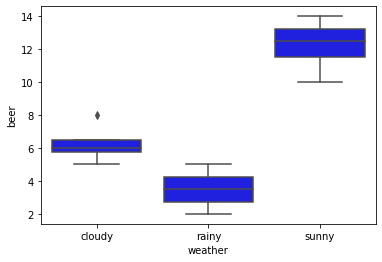

In [96]:
sns.boxplot(x='weather',y='beer',data=weather_beer, color='blue')

In [98]:
# 날씨에 따른 맥주 매출액의 차이는 유의미하다.
am = smf.ols('beer ~ weather', data=weather_beer).fit()
sm.stats.anova_lm(am,typ=2)


,sum_sq,df,F,PR(>F)
weather,160.166667,2.0,38.959459,0.000037
Residual,18.500000,9.0,NaN,NaN


Q. "dataset/7_3_lmm.csv"을 불러와서 선형모델을 생성하고 분산분석을 수행하여 검정 후 유의미한 변수를 선택하세요. 

In [100]:
sales = pd.read_csv("dataset/7_3_lmm.csv")
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


In [103]:
mod_full = smf.ols('sales ~ weather +  humidity + temperature + price',sales).fit()
sm.stats.anova_lm(mod_full,typ=2).round(3)
mod_full.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [102]:
# 습도를 뺀 모델에서 유의미하지 않은 변수는 없음
mod_non_humi = smf.ols('sales ~ weather +  temperature + price',sales).fit()
sm.stats.anova_lm(mod_non_humi,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


- 습도의 영향을 검정한 결과는 다른 독립변수가 있는 조건에서도 습도가 매상에 영향을 끼치고 있는지 판단할 수 있는가를 조사한 것이라고 해석할 수 있음
- 습도는 기온과 강한 상관관계가 있으며 기온이라는 독립변수가 포함되어 있으면 습도는 매상에 영향을 끼친다고 볼 수 없음